Test the RLBench input output functionality for the internal tasks

In [2]:
from rlbench.action_modes.action_mode import MoveArmThenGripper
from rlbench.action_modes.arm_action_modes import EndEffectorPoseViaPlanning
from rlbench.action_modes.gripper_action_modes import Discrete
from rlbench.environment import Environment
from rlbench.observation_config import ObservationConfig
from rlbench.tasks import FS10_V1, ReachTarget, PickUpCup, PutGroceriesInCupboard, StackBlocks, PickAndLift, OpenDrawer, CloseDrawer, HangFrameOnHanger, EmptyDishwasher, BasketballInHoop
import torch
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt
from getdata import RLBenchDataset


Launch the RLBench environment with all the observations enabled

In [15]:
obs_config = ObservationConfig()
obs_config.set_all(True)

env = Environment(
    action_mode=MoveArmThenGripper(
        arm_action_mode=EndEffectorPoseViaPlanning(absolute_mode=True), gripper_action_mode=Discrete()),
    obs_config=ObservationConfig(),
    headless=False)
env.launch()

20
touch the red ball with the panda gripper


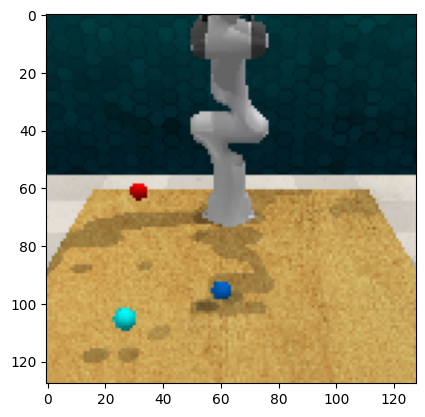

In [16]:

task = env.get_task(ReachTarget)
pp.pprint(task.variation_count())
# Reset the task
descriptions, obs = task.reset()
instruction = descriptions[1]
print(instruction)
plt.imshow(obs.front_rgb)
plt.show()



In [136]:

# set torch print options, align left, 2 decimal places, no scientific notation
torch.set_printoptions(precision=3, sci_mode=False, threshold=10, linewidth=150)

task_name = "reach_target"
# Load the training dataset and create a PyTorch DataLoader object.
train_dataset = RLBenchDataset(
    update=None,
    dataset_name=task_name,
    start_offset_ratio=None,
    split="train",
)
# get a data sample
(data, target) = train_dataset[700]

action = target[0]
print(f'Action: {action}')

Action: tensor([     0.411,      0.077,      0.826,      0.000,     -1.000,      0.000,      0.001,      1.000])


In [138]:
for i in range(10):
    (data, target) = train_dataset[i]
    #print(f'Action: {target[0]}, Task ID: {data["task_id"][0]}, Var ID: {data["variation_id"][0]}')
    pp.pprint(f'Emb: {data["encoder_emb"][0]}')

'Emb: tensor([ 0.046, -0.052, -0.024,  ..., -0.047, -0.096, -0.023])'
'Emb: tensor([ 0.045, -0.052, -0.025,  ..., -0.047, -0.096, -0.023])'
'Emb: tensor([ 0.044, -0.051, -0.023,  ..., -0.047, -0.096, -0.022])'
'Emb: tensor([ 0.045, -0.052, -0.023,  ..., -0.047, -0.096, -0.022])'
'Emb: tensor([ 0.047, -0.048, -0.025,  ..., -0.048, -0.096, -0.020])'
'Emb: tensor([ 0.048, -0.046, -0.024,  ..., -0.049, -0.097, -0.019])'
'Emb: tensor([ 0.049, -0.042, -0.020,  ..., -0.048, -0.095, -0.016])'
'Emb: tensor([ 0.046, -0.050, -0.022,  ..., -0.043, -0.091, -0.020])'
'Emb: tensor([ 0.049, -0.052, -0.020,  ..., -0.045, -0.093, -0.020])'
'Emb: tensor([ 0.051, -0.050, -0.023,  ..., -0.044, -0.097, -0.022])'


In [112]:
action[0] = 0.0
action[1] = 0.3
action[2] = 0.78

Reward: 0.0


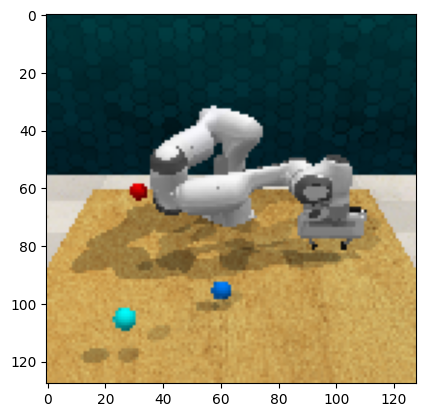

In [113]:

obs, reward, terminate = task.step(action)
print(f'Reward: {reward}')
plt.imshow(obs.front_rgb)

In [6]:
env.shutdown()

[CoppeliaSim:loadinfo]   done.


In [7]:
import h5py
hdf5_file_path = '/home/levi/data/flavaActionDecoderData/reach_target_train.hdf5'
# Open the HDF5 file
hdf5_file = h5py.File(hdf5_file_path, "r")
ep_grp = hdf5_file['0']
print(len(ep_grp['encoder_emb']))
hdf5_file.close()

10
